Import necessary modules

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Load and prepare energy efficiency data set

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx

data_df = pd.read_excel('ENB2012_data.xlsx')
data = np.array(data_df)

N = data.shape[0]
X = data[:,:8]
y = data[:,8]

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validate = scaler.transform(X_validate)
X_test = scaler.transform(X_test)

Construct FFNN model

In [3]:
np.random.seed(42)
tf.random.set_seed(42)


input_layer1 = layers.Input(shape=(8,))
dense_layer1 = layers.Dense(30, activation="relu", input_shape=(8,))(input_layer1)
dense_layer2 = layers.Dense(30, activation="relu")(dense_layer1)
dense_layer3 = layers.Dense(30, activation="relu")(dense_layer2)
dense_layer4 = layers.Dense(30, activation="relu")(dense_layer3)
output_layer1 = layers.Dense(1, activation="relu")(dense_layer4)

model = Model(inputs=input_layer1, outputs=output_layer1)
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_3 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 3,091
Trainable params: 3,091
Non-trainable params: 0
___________________________________________________________

Configure and run training

In [ ]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, batch_size=1, epochs=20, validation_data=(X_validate, y_validate))

Plot training history

<Figure size 1800x1200 with 0 Axes>

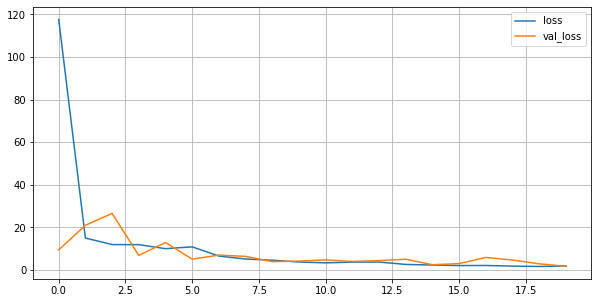

In [5]:
plt.figure(dpi=300)
pd.DataFrame(history.history).plot(figsize=(10, 5))
plt.grid(True)
#plt.gca().set_ylim(0, 1)
plt.show()

Redo plot of training history with logarithmic vertical axis

<Figure size 1800x1200 with 0 Axes>

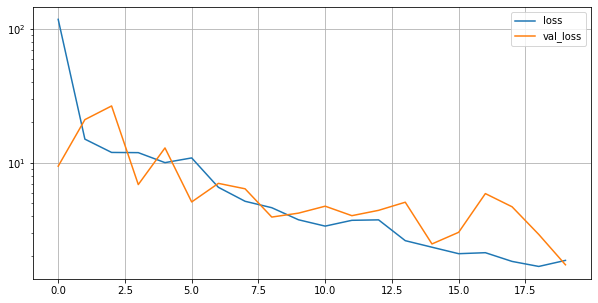

In [6]:
plt.figure(dpi=300)
pd.DataFrame(history.history).plot(figsize=(10, 5),logy=True)
plt.grid(True)
plt.show()

Evaluate model for some input

In [8]:
X_pred = X_test[:3]
y_pred = model.predict(X_pred)
print(y_pred)

[[17.411352]
 [13.725533]
 [34.00802 ]]
